<a href="https://colab.research.google.com/github/slayerzeroa/Life_Insurance_Securitization/blob/main/Life_Settlement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import skewnorm

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,395 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128208 files and di

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
life_table = pd.read_excel("/content/drive/Othercomputers/내 노트북/바탕 화면/SCHOOL LIFE/공모전/DB금융경제공모전/DB_금융경제_공모전/life_table.xlsx")

Mounted at /content/drive


In [ ]:
life_table = pd.read_excel("/content/drive/Othercomputers/내 노트북/바탕 화면/SCHOOL LIFE/공모전/DB금융경제공모전/DB_금융경제_공모전/life_table.xlsx")

In [ ]:
print(life_table)

        연령별  기대여명(전체) (년)  기대여명(남자) (년)  기대여명(여자) (년)  사망확률(전체)  사망확률(남자)  \
0        0세          83.6          80.6          86.6   0.00238   0.00258   
1        1세          82.8          79.8          85.8   0.00014   0.00016   
2        2세          81.8          78.8          84.8   0.00012   0.00014   
3        3세          80.8          77.8          83.8   0.00010   0.00012   
4        4세          79.8          76.9          82.8   0.00008   0.00010   
..      ...           ...           ...           ...       ...       ...   
96      96세           3.2           2.7           3.3   0.22756   0.26973   
97      97세           2.9           2.5           3.1   0.24726   0.29092   
98      98세           2.7           2.4           2.8   0.26770   0.31281   
99      99세           2.6           2.2           2.6   0.28879   0.33532   
100  100세이상           2.4           2.1           2.5   1.00000   1.00000   

     사망확률(여자)  생존자(전체)  생존자(남자)  생존자(여자)  정지인구(전체)  정지인구(남자)  정지인구(여자)  \
0

In [ ]:
life_table=life_table.loc[:,['연령별','사망확률(전체)']]
life_table=life_table.reset_index()

In [ ]:
life_table

,index,연령별,사망확률(전체)
0,0,0세,0.00238
1,1,1세,0.00014
2,2,2세,0.00012
3,3,3세,0.00010
4,4,4세,0.00008
...,...,...,...
96,96,96세,0.22756
97,97,97세,0.24726
98,98,98세,0.26770
99,99,99세,0.28879


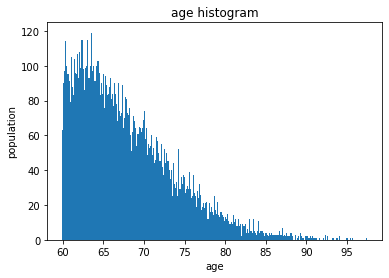

In [ ]:
# skewness가 포함된 나이 생성
a, loc, scale = 400.0, 60.0, 10.0
data = skewnorm(a, loc, scale).rvs(size=10000)
plt.title('age histogram')
plt.xlabel('age')
plt.ylabel('population')
plt.hist(data, bins=300)
plt.show()

In [ ]:
age_pd=pd.DataFrame(list(map(int, data)))
age_pd.columns=['index']

In [ ]:
# mu=80
# sigma=5
# age_pd=pd.DataFrame([int(i) for i in np.random.normal(mu, sigma, size=300)])
# age_pd.columns=['index']
# #age_pd=age_pd.reset_index()

In [ ]:
age_pd

,index
0,76
1,64
2,60
3,64
4,67
...,...
9995,64
9996,68
9997,67
9998,70


In [ ]:
merge_df = pd.merge(life_table,age_pd, how='inner',on='index')

In [ ]:
death_age_list=[]
for i in age_pd.values:
    age=i[0]
    # print('나이',age)
    death_age=age
    one_person_table=life_table.loc[life_table.index>=age]
    # print(age,one_person_table)
    for num in range(100):
        death=one_person_table.loc[:,'사망확률(전체)'].iloc[num]
        # print(death)
        result=random.choices(range(2), weights = [1-death, death])[0]
        # print(result)

        if result == 1 :
            death_age_list.append(death_age)
            break
        else:
            death_age+=1



    # print('죽을나이는 %s 입니다.'%death_age)
    #print()


In [ ]:
pd.DataFrame(death_age_list)-age_pd.values

,0
0,21
1,26
2,1
3,27
4,16
...,...
9995,14
9996,18
9997,22
9998,7


In [ ]:
age_data=pd.concat([age_pd,pd.DataFrame(death_age_list,columns=['사망나이'])],axis=1)
age_data.columns=['나이','사망나이']

In [ ]:
age_data

,나이,사망나이
0,76,97
1,64,90
2,60,61
3,64,91
4,67,83
...,...,...
9995,64,78
9996,68,86
9997,67,89
9998,70,77


In [ ]:
# Theta를 구하기 위해 필요한 함수들

# PVEP
def PVEP(Pi: np.array, T: int, Pr: np.array, r: float, random_seed=7):
  np.random.seed(random_seed)
  PVEP_sheet = np.zeros(shape=[T])
  PVEP_sheet[0] = Pi[0]

  for i in range(1, T):
    PVEP_sheet[i] = PVEP_sheet[i-1] + (Pi[i]*np.cumprod(Pr[:i])[-1]*((1/(1+r))**i))

  return PVEP_sheet

# PVEL
def PVEL(T: int, OL_sheet: np.array, B: int, Pr: np.array, r: float, random_seed=7):
  np.random.seed(random_seed)
  PVEL_sheet = np.zeros(shape=[T])

  for t in range(1, T):
    PVEL_sheet[t] = PVEL_sheet[t-1] + (max((OL_sheet[t] - B), 0) * ((1/(1+r))**(t)) * (Pr[t-1]-Pr[t]))
  return PVEL_sheet

# OL
def OL_sim(OL_0: int, T: int, Theta: int, m: int, r: int):
  OL_sheet = np.zeros(shape=[T])
  OL_sheet[0] = OL_0
  for i in range(1, T):
    OL_sheet[i] = (OL_sheet[i-1] + Theta) * (1 + m) * (1 + r)

  return OL_sheet

# Pi
def Pi_sim(OL_sheet: np.array, Theta: int, m: float):
  return (OL_sheet + Theta) * m

In [ ]:
#Theta 계산 Bisection Method

def Cal_Theta(Pi_0, B, Pr, OL_0, r, m, T, tol=10**(-5), k=1, kmax=100):
  theta_bisec = []
  theta_a, theta_b = -B, 0
  theta_diff = theta_b - theta_a
  while (theta_diff >= tol and k < kmax):
    theta_mid = 0.5 * (theta_a + theta_b)
    theta_bisec.append(theta_mid)

    Pi_sheet_a = Pi_sim(OL_sim(OL_0, T, theta_a, m, r), theta_a, m) #myfunc(theta_a)
    Pi_sheet_a[0] = Pi_0
    PVEP_sheet_a = PVEP(Pi_sheet_a, T, Pr, r)
    PVEL_sheet_a = PVEL(T, OL_sim(OL_0, T, theta_a, m, r), B, Pr, r)
    fval_theta_a = PVEP_sheet_a[-1] - PVEL_sheet_a[-1]

    Pi_sheet_b = Pi_sim(OL_sim(OL_0, T, theta_b, m, r), theta_b, m) #myfunc(theta_a)
    Pi_sheet_b[0] = Pi_0
    PVEP_sheet_b = PVEP(Pi_sheet_b, T, Pr, r)
    PVEL_sheet_b = PVEL(T, OL_sim(OL_0, T, theta_b, m, r), B, Pr, r)
    fval_theta_b = PVEP_sheet_b[-1] - PVEL_sheet_b[-1]

    Pi_sheet_mid = Pi_sim(OL_sim(OL_0, T, theta_mid, m, r), theta_mid, m) #myfunc(theta_a)
    Pi_sheet_mid[0] = Pi_0
    PVEP_sheet_mid = PVEP(Pi_sheet_mid, T, Pr, r)
    PVEL_sheet_mid = PVEL(T, OL_sim(OL_0, T, theta_mid, m, r), B, Pr, r)
    fval_theta_mid = PVEP_sheet_mid[-1] - PVEL_sheet_mid[-1]

    if fval_theta_a * fval_theta_mid < 0:
        theta_b = theta_mid
    else:
        theta_a = theta_mid

    theta_diff = theta_b - theta_a
    k += 1
  return theta_b

In [ ]:
# 각 사람들의 연지급금 계산
Theta_list = []
B_list = []
for data in range(len(age_data)):
  B = 5000 + random.randint(0, 15000)
  OL_0 = B*0.05
  Pr = np.array(1 - life_table.T.loc['사망확률(전체)'].iloc[age_data.iloc[data, :][0]: age_data.iloc[data, :][1]+1])
  T = len(Pr)
  r = 0.038
  m = 0.02
  Pi_0 = OL_0
  B_list.append(B)
  Theta_list.append(-int(Cal_Theta(Pi_0, B, Pr, OL_0, r, m, T)))


In [ ]:
ins_pd=pd.DataFrame(B_list)
ins_pd.columns=['보험금']

In [ ]:
data=pd.concat([age_data,ins_pd],axis=1)

In [ ]:
start_pi=pd.DataFrame(Theta_list,columns=['연지급금'])

In [ ]:
start_pi

,연지급금
0,442
1,310
2,0
3,236
4,252
...,...
9995,624
9996,344
9997,209
9998,798


In [ ]:
data=pd.concat([data,start_pi],axis=1)

In [ ]:
data

,나이,사망나이,보험금,연지급금
0,76,97,13735,442
1,64,90,19296,310
2,60,61,13924,0
3,64,91,15118,236
4,67,83,8995,252
...,...,...,...,...
9995,64,78,19412,624
9996,68,86,13773,344
9997,67,89,10447,209
9998,70,77,8813,798


In [ ]:
interestrate_list=[]
interest=0.038
for i in range(50):
    if interest >0.02:
        interest=interest-0.0025
    else:
        interest=interest
    interestrate_list.append(interest)

In [ ]:
interestrate_list=np.array(interestrate_list)+0.05 # 3% 투자자의 이익 아직 미정

In [ ]:
#이자율 리스트 생성 (기간에 따라 다를 수 있으므로)
interest_pd=[0]+interestrate_list

In [ ]:
interest_pd

array([0.0855, 0.083 , 0.0805, 0.078 , 0.0755, 0.073 , 0.0705, 0.068 ,
       0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 ,
       0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 ,
       0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 ,
       0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 ,
       0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 , 0.068 ,
       0.068 , 0.068 ])

In [ ]:
froud_prob=0.003 # 보험자 면책 사유 확률
return_prob=0.2 # 중도 상환 리스크
fee_profit=0.05 #중도 상환을 원할 시 Disadvantage

In [ ]:

all_person_pd=pd.DataFrame()
for i in data.index:
    one_person=data.iloc[i]
    # print(one_person)
    year=one_person.사망나이 -one_person.나이

    return_result=random.choices(range(2), weights = [1-return_prob, return_prob])[0] #중도환급할확률
    # print(return_result)
    fee=0
    if return_result ==1:
        return_age=random.randint(one_person.나이,one_person.사망나이) #대출금을 갚을 나이
        year=return_age-one_person.나이
        fee=1
        #year 보험금이 꾸준히 지급되는



    pi_list=[-one_person.loc['연지급금']]*(year+1)
    m_list=[0]+[0.01]*year

    act_loss_list=pi_list#(pi_list*year)
    # print(act_loss_list)
    #break


    loss_list=(pi_list* (1+np.array(m_list)).cumprod() * (1+np.array(interest_pd[:year+1])).cumprod()) #미래가치 반영되어있음
    if fee ==1: #중도해약시
        all_loss=list(loss_list.cumsum())[-1]*(1+fee_profit) #all_loss 내가 나중에 한번에 받는금액
    else:
        all_loss=list(loss_list.cumsum())[-1]

    if one_person.보험금 < abs(all_loss):
        all_loss=one_person.보험금
    else:
        all_loss=abs(all_loss)#*interest

    froud=random.choices(range(2), weights = [1-froud_prob, froud_prob])[0]
    # print(froud)
    if froud==1: #사기일 경우
        all_loss=0

    cash_pd=pd.DataFrame(np.array(list(act_loss_list)+[abs(all_loss)]+[0]*(len(interest_pd)-year-1)))

    # print(cash_pd)
    #break

    one_person_pd=cash_pd.T
    #for z in year:
    all_person_pd=all_person_pd.append(one_person_pd)




In [ ]:
all_person_pd

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-442.0,-442.0,-442.0,-442.0,-442.0,3022.176503,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,-310.0,-310.0,-310.0,-310.0,-310.0,-310.000000,-310.000000,-310.0,-310.0,-310.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,-236.0,-236.0,-236.0,-236.0,-236.0,-236.000000,-236.000000,-236.0,-236.0,-236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,-252.0,-252.0,-252.0,-252.0,-252.0,-252.000000,-252.000000,-252.0,-252.0,-252.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-624.0,-624.0,-624.0,-624.0,-624.0,-624.000000,-624.000000,-624.0,-624.0,-624.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,-344.0,-344.0,-344.0,-344.0,-344.0,-344.000000,2951.984182,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,-209.0,-209.0,-209.0,-209.0,-209.0,-209.000000,-209.000000,-209.0,-209.0,-209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,-798.0,-798.0,-798.0,-798.0,-798.0,-798.000000,-798.000000,-798.0,8813.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'cash')

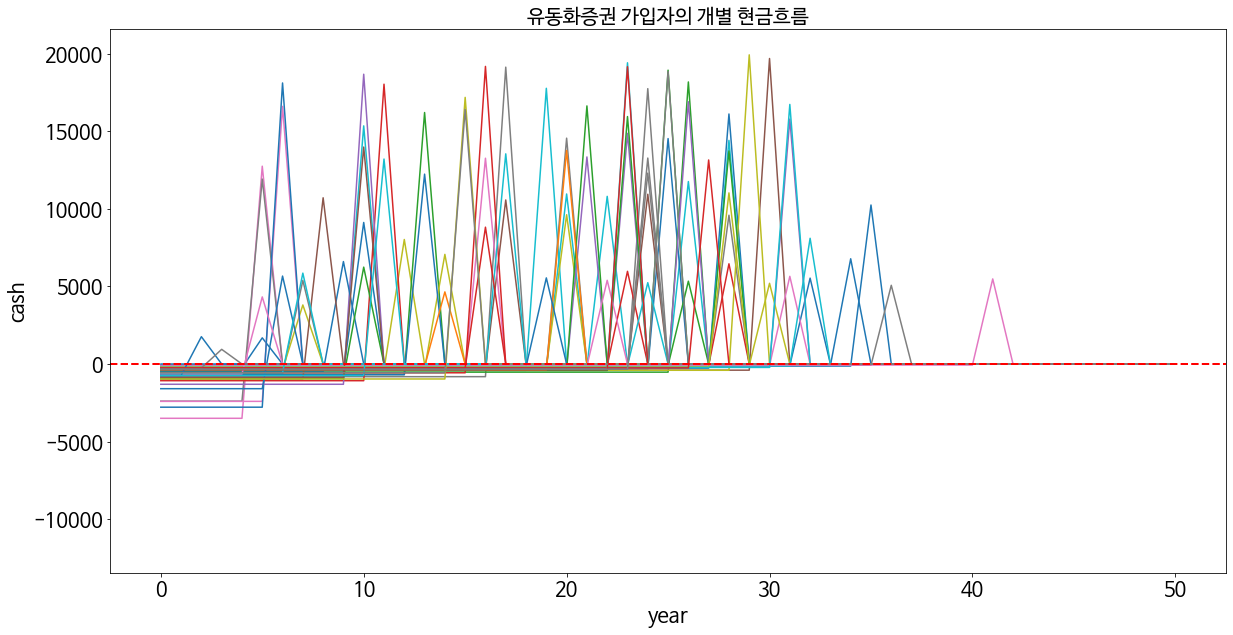

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,10))
for i in range(len(all_person_pd)):
    one_p=all_person_pd.iloc[i]
    #print(one_p)
    #one_p=one_p.loc[one_p.values>0]
    #print(one_p)
    one_p.plot(alpha=random.choices([1, 0], weights = [1-0.99, 0.99])[0])
plt.rc('font', family='NanumBarunGothic')
plt.title('유동화증권 가입자의 개별 현금흐름',fontsize =20)
plt.xlabel('year',fontsize =20)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.axhline(4.0, 0, 1, color='red', linestyle='--', linewidth=2)
plt.ylabel('cash',fontsize =20)

Text(0, 0.5, 'cash')

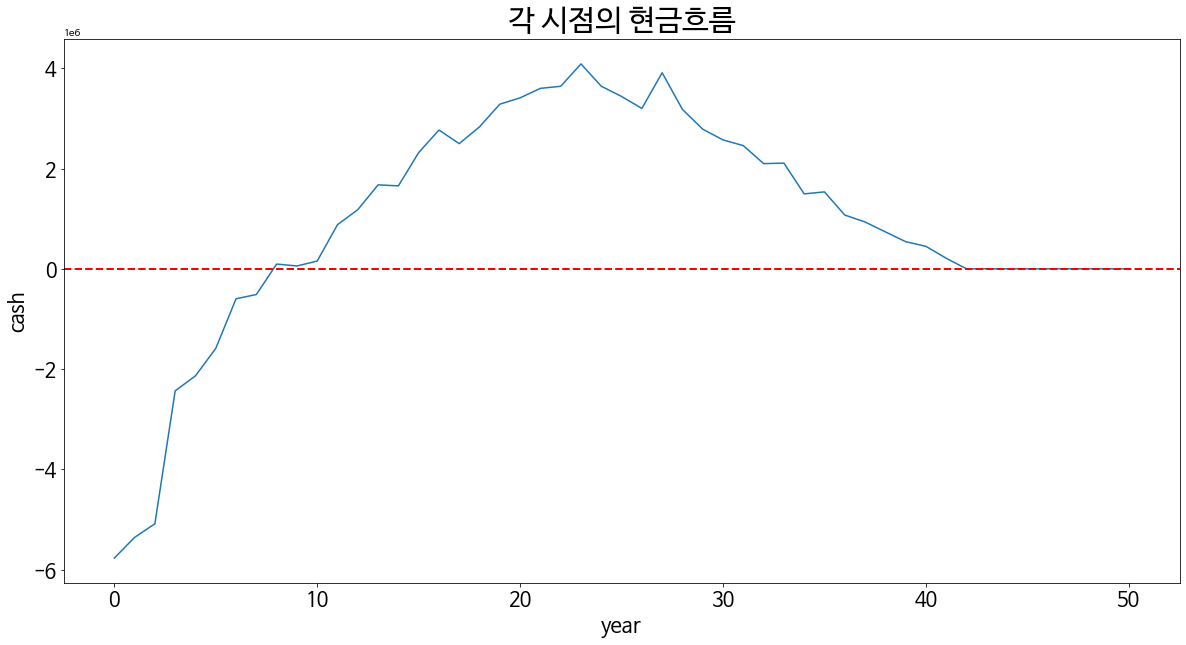

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,10))
all_person_pd.sum().plot()
plt.title('각 시점의 현금흐름',fontsize =30)
plt.xlabel('year',fontsize =20)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.axhline(4.0, 0, 1, color='red', linestyle='--', linewidth=2)
plt.ylabel('cash',fontsize =20)

<AxesSubplot:>

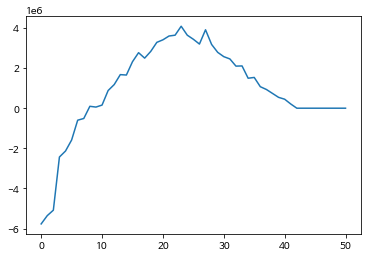

In [ ]:
all_person_pd.sum().plot()

In [ ]:
all_person_pd.sum().cumsum()

0    -5.769637e+06
1    -1.112687e+07
2    -1.621209e+07
3    -1.864595e+07
4    -2.078077e+07
5    -2.236861e+07
6    -2.296620e+07
7    -2.347880e+07
8    -2.338400e+07
9    -2.332763e+07
10   -2.317273e+07
11   -2.229212e+07
12   -2.111320e+07
13   -1.943890e+07
14   -1.778496e+07
15   -1.546764e+07
16   -1.269958e+07
17   -1.020310e+07
18   -7.370881e+06
19   -4.087526e+06
20   -6.779789e+05
21    2.921110e+06
22    6.561585e+06
23    1.064818e+07
24    1.428959e+07
25    1.772692e+07
26    2.092545e+07
27    2.483573e+07
28    2.801423e+07
29    3.079948e+07
30    3.336985e+07
31    3.582678e+07
32    3.792478e+07
33    4.003250e+07
34    4.152715e+07
35    4.306101e+07
36    4.413338e+07
37    4.506670e+07
38    4.580387e+07
39    4.634496e+07
40    4.679305e+07
41    4.700300e+07
42    4.700300e+07
43    4.700300e+07
44    4.700300e+07
45    4.700300e+07
46    4.700300e+07
47    4.700300e+07
48    4.700300e+07
49    4.700300e+07
50    4.700300e+07
dtype: float64

In [ ]:
all_profit_pd=all_person_pd.sum()

In [ ]:
#사람이 n명일경우

all_profit_pd=all_profit_pd.loc[all_profit_pd!=0]

Text(0, 0.5, 'cash')

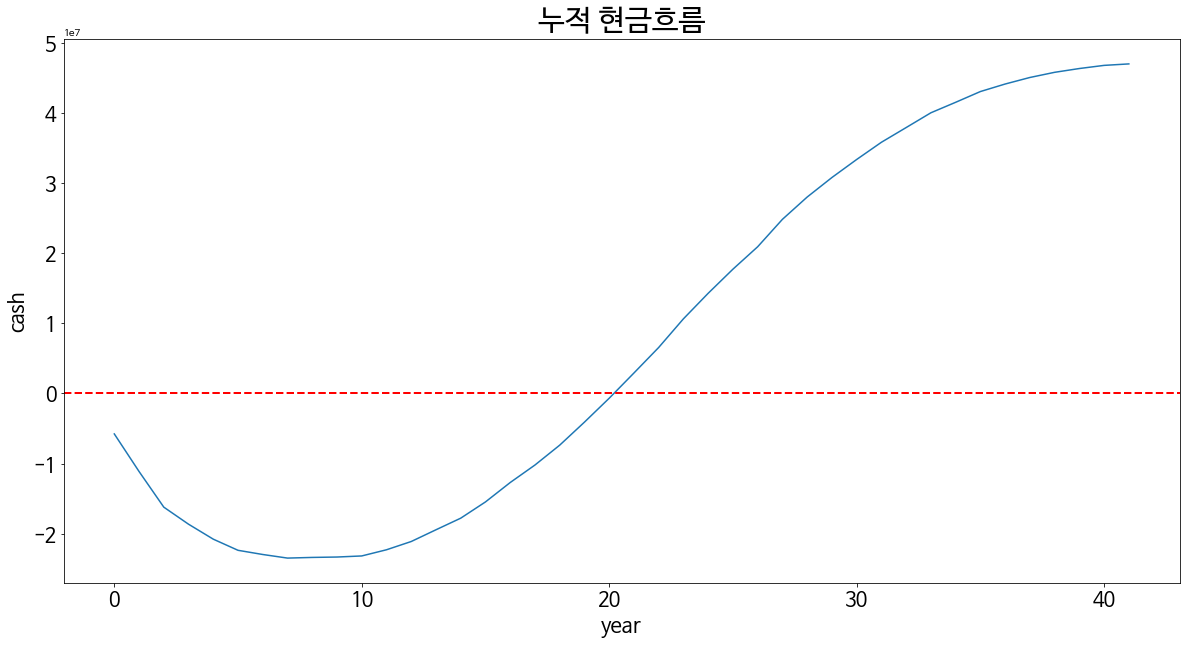

In [ ]:

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,10))
all_profit_pd.cumsum().plot()
plt.title('누적 현금흐름',fontsize =30)
plt.xlabel('year',fontsize =20)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.axhline(4.0, 0, 1, color='red', linestyle='--', linewidth=2)
plt.ylabel('cash',fontsize =20)

In [ ]:
!pip install numpy_financial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy as sp
import numpy_financial as npf

irr=npf.irr(all_profit_pd)

In [ ]:
irr

0.053696207946560603